In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
df.drop(['Id'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_org=copy.deepcopy(df)

In [6]:
Species=df.Species
df.drop(['Species'],axis=1,inplace=True)

I drop species as I don't want it to have effect on my clustering

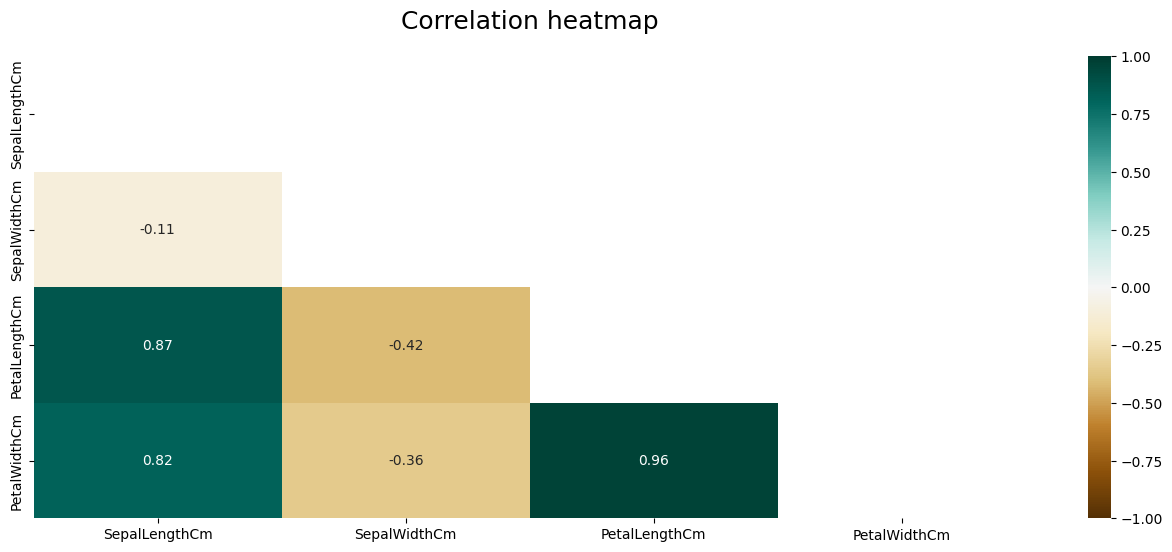

In [7]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':18}, pad=20)
plt.show()

It seems there's high correlation between sepal length and other properities and in normal circumstances I would suggest to drop it but as there's not much properities we have.


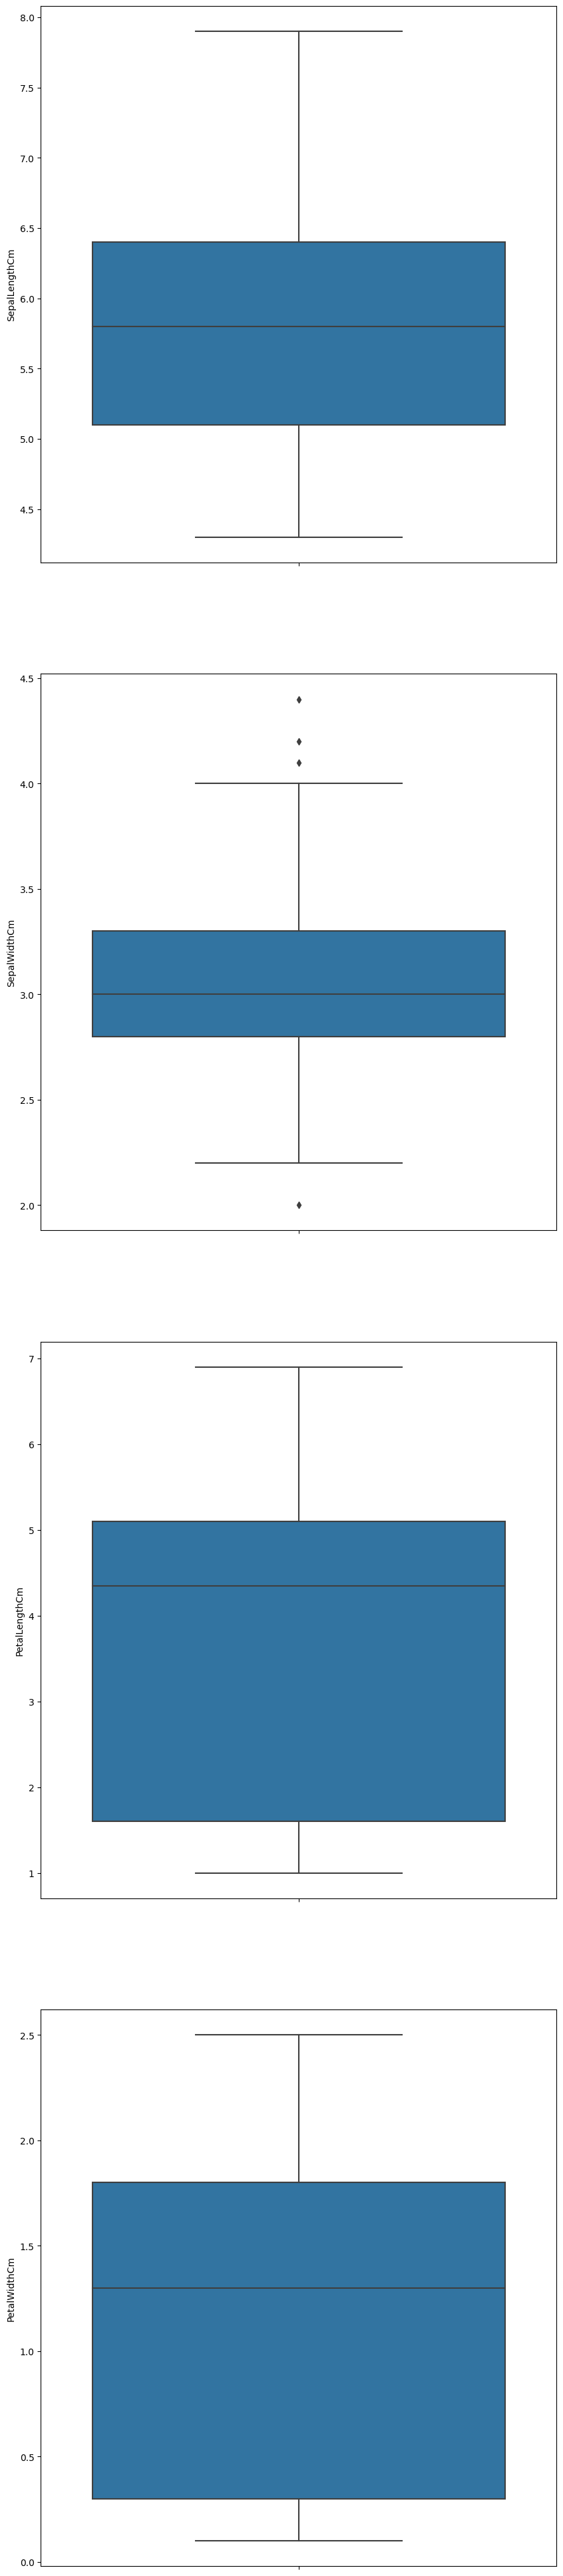

In [8]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10,50))
for i in range(len(df.columns)):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

Sepal width have some outliers so we should coarce the outliers

In [9]:
def boxplot_clip(col):
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    iqr = q3 -  q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [10]:
for i in df.columns:
    boxplot_clip(i)

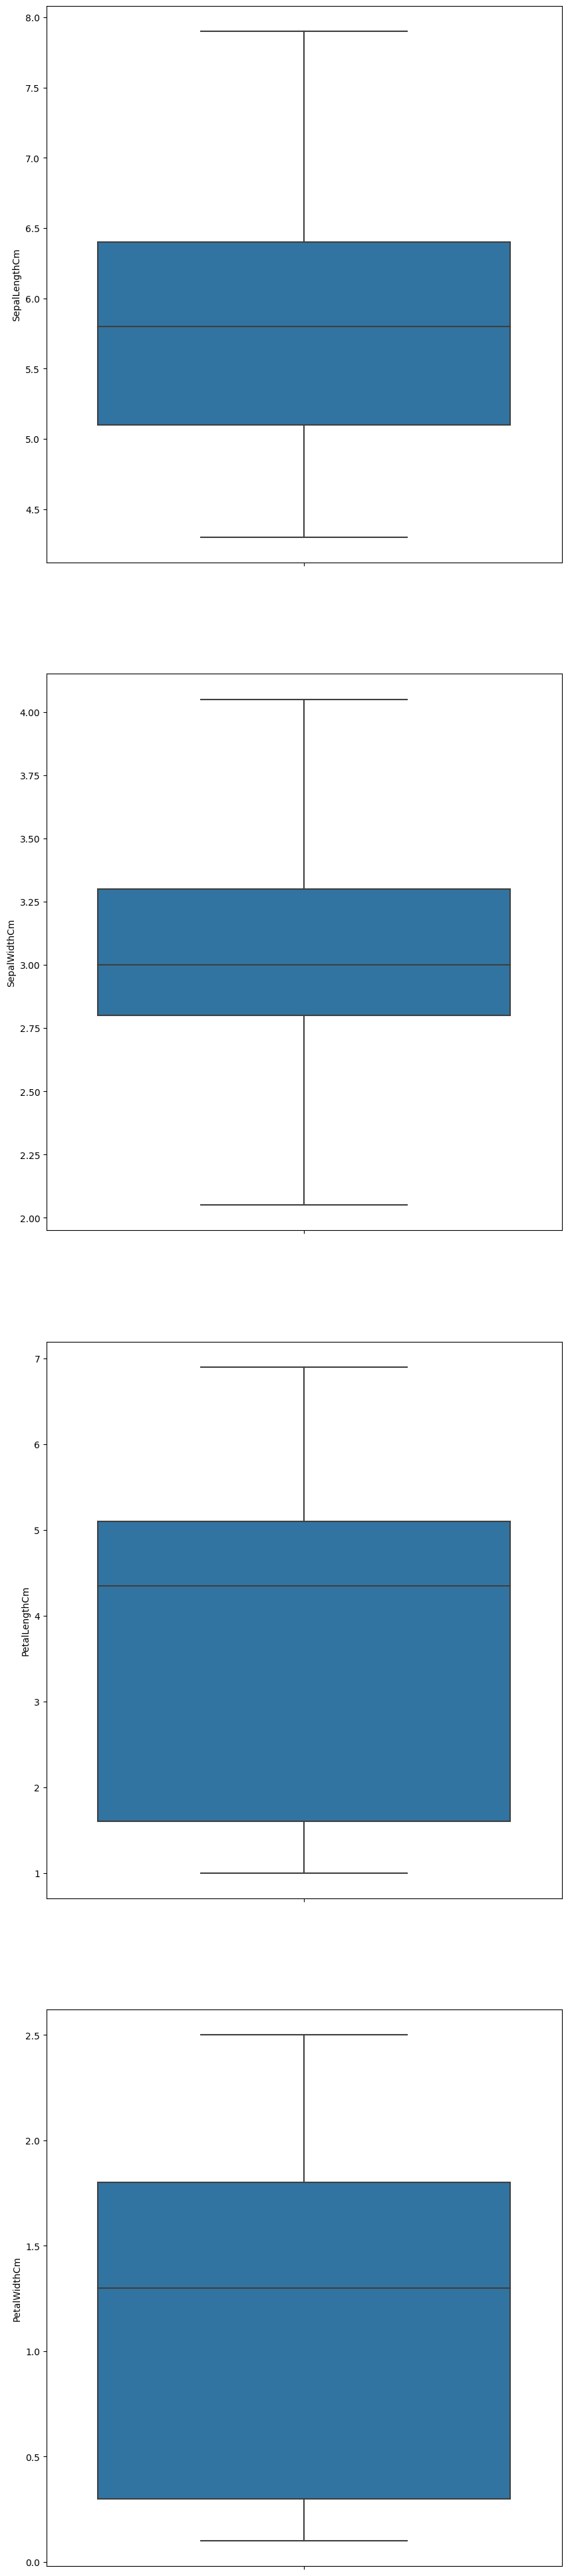

In [11]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(10,50))
for i in range(len(df.columns)):
    sns.boxplot(ax=axes[i], y=df.columns[i], data=df)

now there is no outliers to worry about

In [12]:
from sklearn.preprocessing import StandardScaler
column_names = df.columns
s = StandardScaler()
df = s.fit_transform(df)

In [13]:
df=pd.DataFrame(df,columns=column_names,index=Species)

In [14]:
df_kmeans=copy.deepcopy(df)

In [15]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df_kmeans)

c:\Users\orkhan.mammadli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

I didn't use elbow method or silloutte as  we have to classify on 3 species  

In [16]:
df_kmeans['k_means_cluster'] = k_means.labels_

cluster 0 is  iris virginica
cluster 1 is Iris-versicolor
cluster 2 is Iris-setosa	

In [17]:
df_kmeans[df_kmeans["k_means_cluster"]==0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,k_means_cluster
Species,,,,,
Iris-versicolor,-0.416010,-1.780420,0.137236,0.133226,0
Iris-versicolor,0.795669,-0.594528,0.478430,0.396172,0
Iris-versicolor,-0.173674,-0.594528,0.421564,0.133226,0
Iris-versicolor,-1.143017,-1.543242,-0.260824,-0.261193,0
Iris-versicolor,0.916837,-0.357349,0.478430,0.133226,0


In [18]:
df_kmeans[df_kmeans["k_means_cluster"]==1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,k_means_cluster
Species,,,,,
Iris-setosa,-0.900681,1.065722,-1.341272,-1.312977,1
Iris-setosa,-1.143017,-0.120170,-1.341272,-1.312977,1
Iris-setosa,-1.385353,0.354187,-1.398138,-1.312977,1
Iris-setosa,-1.506521,0.117008,-1.284407,-1.312977,1
Iris-setosa,-1.021849,1.302901,-1.341272,-1.312977,1


In [38]:
df[df["k_means_cluster"]==2]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,k_means_cluster
Species,,,,,
Iris-setosa,-0.900681,1.065722,-1.341272,-1.312977,2
Iris-setosa,-1.143017,-0.120170,-1.341272,-1.312977,2
Iris-setosa,-1.385353,0.354187,-1.398138,-1.312977,2
Iris-setosa,-1.506521,0.117008,-1.284407,-1.312977,2
Iris-setosa,-1.021849,1.302901,-1.341272,-1.312977,2


In [20]:
df_kmeans.k_means_cluster.replace(to_replace={0:'Iris-virginica',
                                              1:'Iris-versicolor',
                                              2:'Iris-setosa'},
                                              inplace=True)

In [21]:
df_kmeans

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,k_means_cluster
Species,,,,,
Iris-setosa,-0.900681,1.065722,-1.341272,-1.312977,Iris-versicolor
Iris-setosa,-1.143017,-0.120170,-1.341272,-1.312977,Iris-versicolor
Iris-setosa,-1.385353,0.354187,-1.398138,-1.312977,Iris-versicolor
Iris-setosa,-1.506521,0.117008,-1.284407,-1.312977,Iris-versicolor
Iris-setosa,-1.021849,1.302901,-1.341272,-1.312977,Iris-versicolor
...,...,...,...,...,...
Iris-virginica,1.038005,-0.120170,0.819624,1.447956,Iris-setosa
Iris-virginica,0.553333,-1.306063,0.705893,0.922064,iris virginica
Iris-virginica,0.795669,-0.120170,0.819624,1.053537,Iris-setosa


In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean' , linkage='ward')
hc_clusters = hc.fit_predict(df)

In [26]:
df['hc_cluster'] = hc_clusters

cluster 0 is Iris-versicolor
cluster 1 is Iris-setosa	
cluster 2 is Iris-virginica	

In [31]:
df['hc_cluster'].replace(to_replace={2:'Iris-virginica',
                                           1:'Iris-setosa',
                                           0:'Iris-versicolor'}, 
                                           inplace=True)

In [33]:
df['k_means']=df_kmeans['k_means_cluster']

In [44]:
df.reset_index(inplace=True)

In [45]:
df

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,hc_cluster,k_means
0,Iris-setosa,-0.900681,1.065722,-1.341272,-1.312977,Iris-setosa,Iris-versicolor
1,Iris-setosa,-1.143017,-0.120170,-1.341272,-1.312977,Iris-setosa,Iris-versicolor
2,Iris-setosa,-1.385353,0.354187,-1.398138,-1.312977,Iris-setosa,Iris-versicolor
3,Iris-setosa,-1.506521,0.117008,-1.284407,-1.312977,Iris-setosa,Iris-versicolor
4,Iris-setosa,-1.021849,1.302901,-1.341272,-1.312977,Iris-setosa,Iris-versicolor
...,...,...,...,...,...,...,...
145,Iris-virginica,1.038005,-0.120170,0.819624,1.447956,Iris-virginica,Iris-setosa
146,Iris-virginica,0.553333,-1.306063,0.705893,0.922064,Iris-versicolor,iris virginica
147,Iris-virginica,0.795669,-0.120170,0.819624,1.053537,Iris-virginica,Iris-setosa
148,Iris-virginica,0.432165,0.828544,0.933356,1.447956,Iris-virginica,Iris-setosa


<Axes: xlabel='Species', ylabel='k_means'>

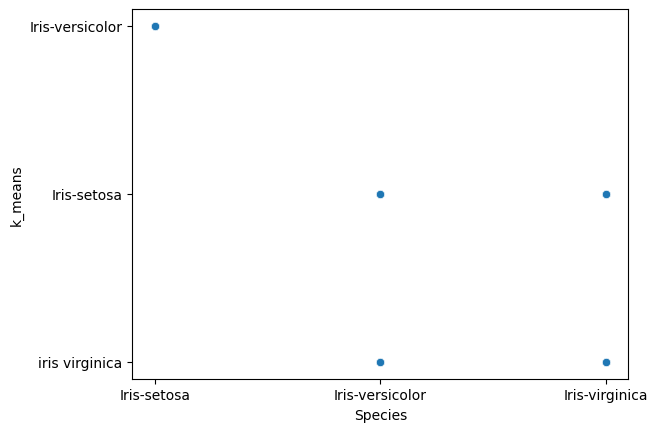